# Context

This is the halloween data set again but this time we will use **PRINCIPAL COMPONENT ANALYSIS** to reduce the dimension space and plot


In [3]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import os, sys, plotly.graph_objects as go
module_path = os.path.abspath(os.path.join('../../../../..'))
if module_path not in sys.path:
    sys.path.append(module_path) 
from erudition.learning.helpers.plots.plotly_render import render, scatter, bar, shape_rect

Load the candy data dataset into a DataFrame

In [7]:
df = pd.read_csv('~/notebooks/data/regression/halloween_candy/candy-data.csv')

df.fillna('', inplace=True)

X = df[[c for c in df.columns if c not in ['competitorname', 'chocolate']]]
y = df[['chocolate']]

Now fit the independent variable space to the PCA model

In [19]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

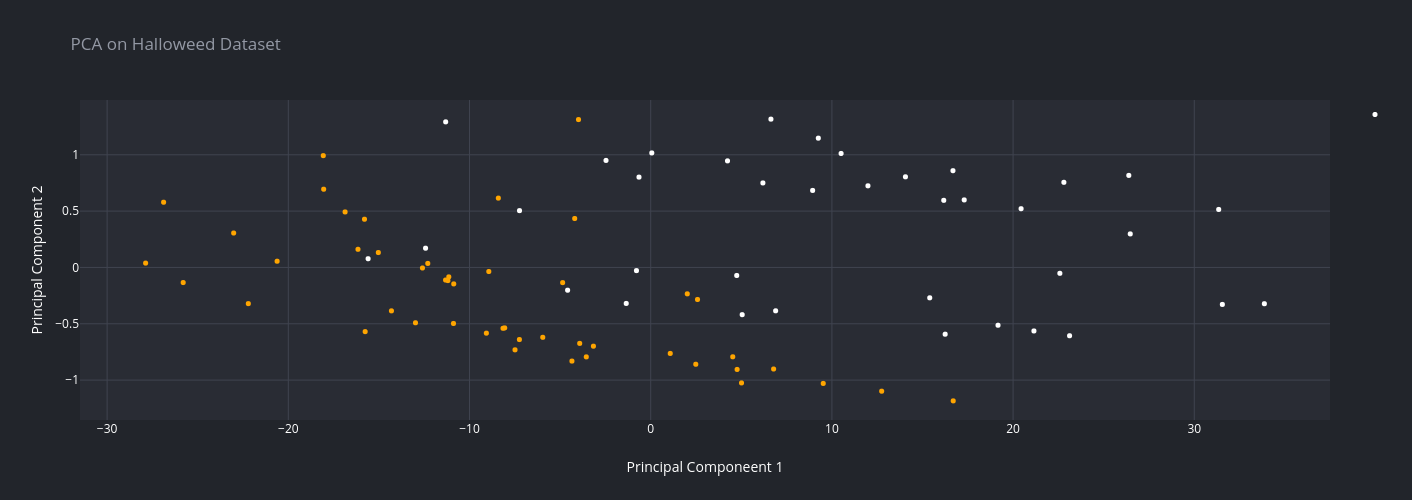

In [54]:
fig = go.Figure(
    data=[
        scatter(X_pca[:,0],X_pca[:,1], '', mode='markers', color = [['orange', 'white'][a] for a in y.to_numpy().reshape(len(y))], size=5, opacity=1)
    ]
)
render(fig, title='PCA on Halloweed Dataset', x_axis_title='Principal Componeent 1', y_axis_title='Principal Component 2')

In [57]:
pca.explained_variance_ratio_

array([0.99414648, 0.00195817])

# Feature Scaling

PCA requires the features to be scaled

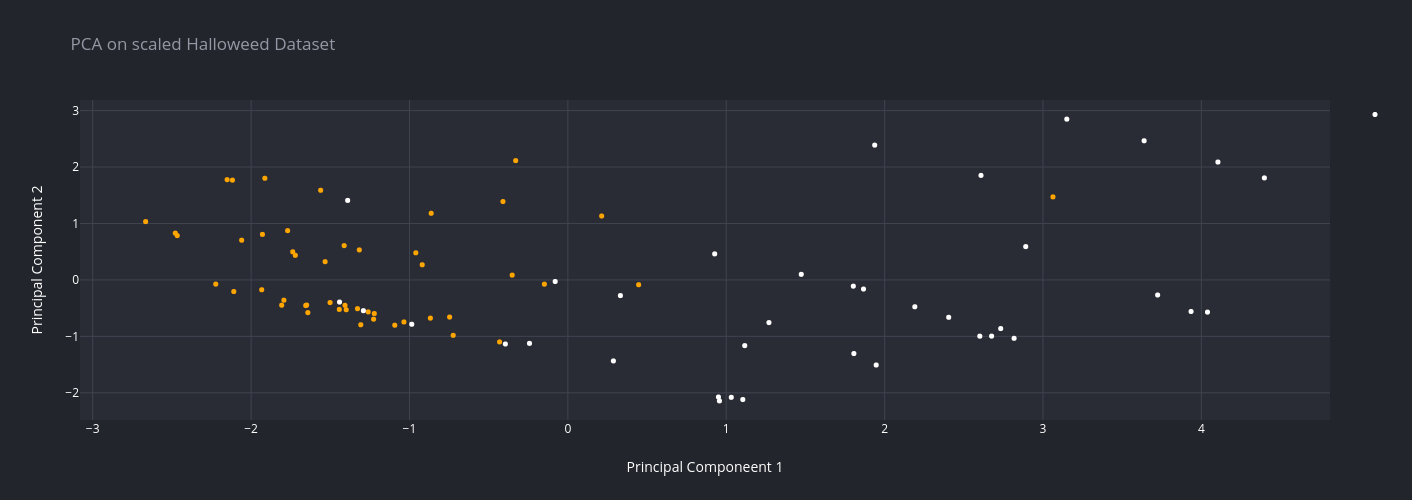

In [61]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

fig = go.Figure(
    data=[
        scatter(X_pca[:,0],X_pca[:,1], '', mode='markers', color = [['orange', 'white'][a] for a in y.to_numpy().reshape(len(y))], size=5, opacity=1)
    ]
)
render(fig, title='PCA on scaled Halloweed Dataset', x_axis_title='Principal Componeent 1', y_axis_title='Principal Component 2')


In [59]:
pca.explained_variance_ratio_

array([0.33511805, 0.11288507])

As the combined explained ratio is below 85% its not suitable for 2 component PCA dimensionality reduction.

Let's try the iris data set

In [79]:
from sklearn.datasets import load_iris

data = load_iris()

X = data.data
y = data.target

print(X.shape)

# scale

X = StandardScaler().fit_transform(X)

(150, 4)


In [72]:
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X,y)

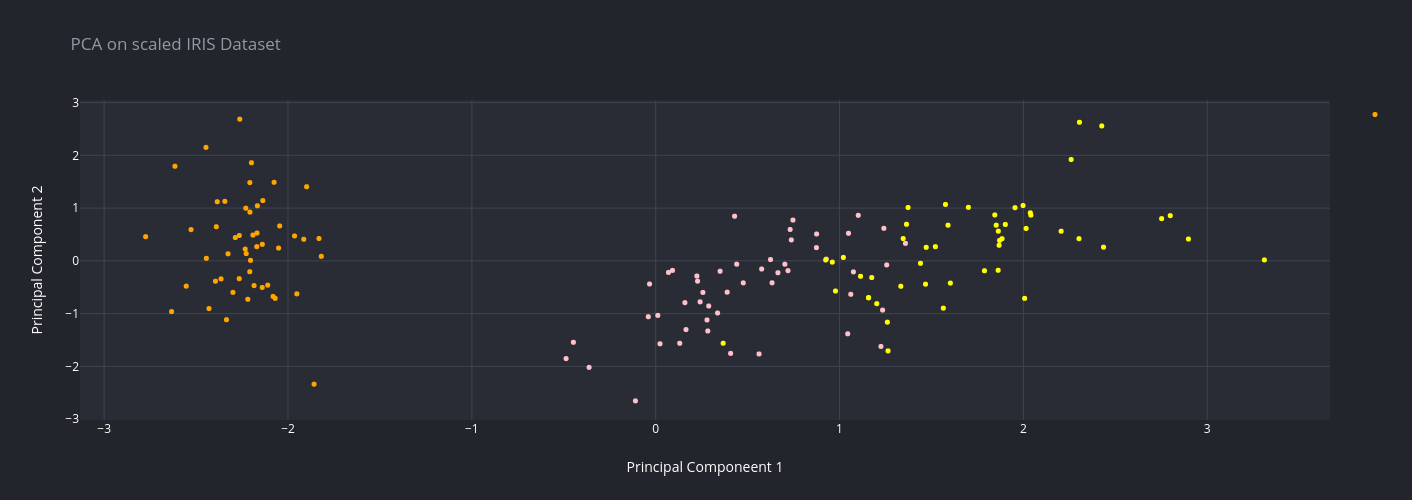

In [83]:
fig = go.Figure(
    data=[
        scatter(X_pca[:,0],X_pca[:,1], '', mode='markers', color = [['orange', 'pink', 'yellow'][a] for a in y], size=5, opacity=1)
    ]
)
render(fig, title='PCA on scaled IRIS Dataset', x_axis_title='Principal Componeent 1', y_axis_title='Principal Component 2')

In [78]:
sum(pca.explained_variance_ratio_)

0.9581320720000164

Here we see the explained ratio after principal component analysis is 95% which means we have captured much of the variance in the original 4 dimensions.